# Setup 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import json
import pandas as pd

In [4]:
ROOT_DIR = '../../'
import sys
sys.path.insert(0, ROOT_DIR)

import eval_utils

## Define models to eval 

In [5]:
EVAL_DATASET = 'single-pixel-color'
MODEL_TYPE = 'contextual'

In [6]:
eval_results = eval_utils.load_eval_results(EVAL_DATASET, MODEL_TYPE, listener_types=['val'])

# Vocab Distribution 

In [7]:
listener_type = 'val' # pick 'val' since there's only one val listener regardless of speaker type; when there are multiple listeners there are nested dicts in `eval_results`
vocab_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

In [8]:
dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in vocab_dist]

<AxesSubplot:ylabel='Proportion'>

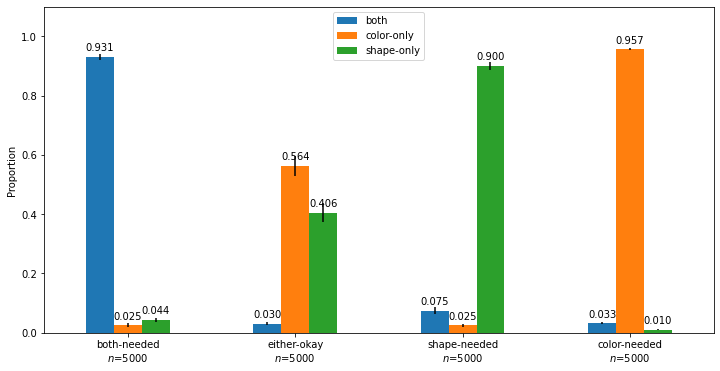

In [9]:
eval_utils.visualize_utterance_distribution(dist_per_speaker)

### When target is red circle

<AxesSubplot:ylabel='Proportion'>

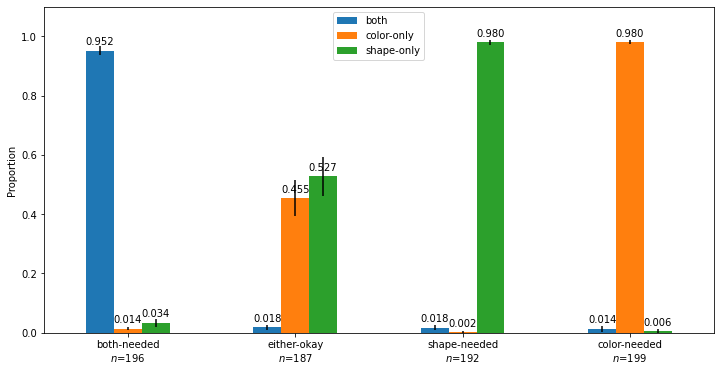

In [10]:
red_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
red_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_circle_dist]
eval_utils.visualize_utterance_distribution(red_circle_dist_per_speaker)

### Target is non-red circle 

<AxesSubplot:ylabel='Proportion'>

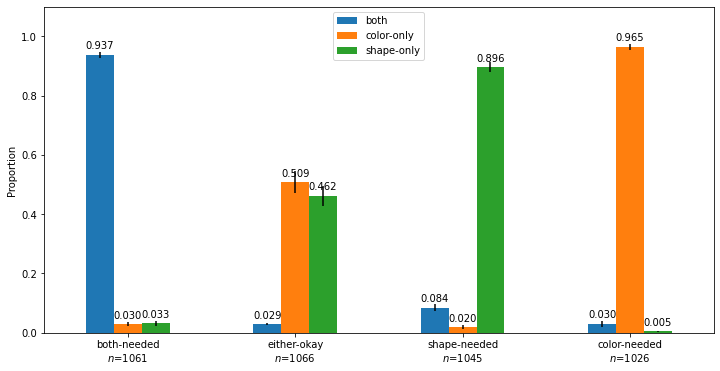

In [11]:
nonred_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
nonred_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_circle_dist]
eval_utils.visualize_utterance_distribution(nonred_circle_dist_per_speaker)

### Target is red non-circle 

<AxesSubplot:ylabel='Proportion'>

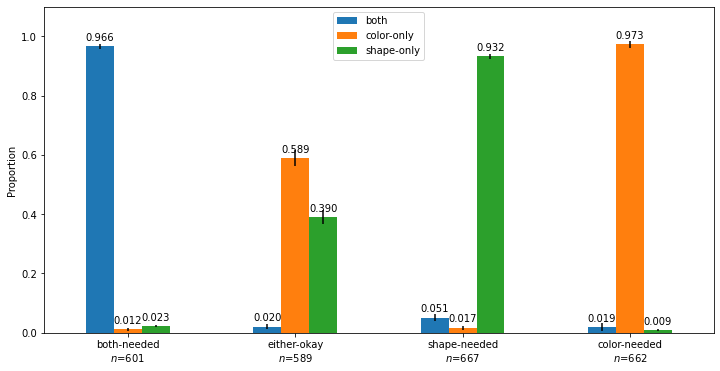

In [12]:
red_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
red_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_noncircle_dist]
eval_utils.visualize_utterance_distribution(red_noncircle_dist_per_speaker)

### Target is neither red nor circle

<AxesSubplot:ylabel='Proportion'>

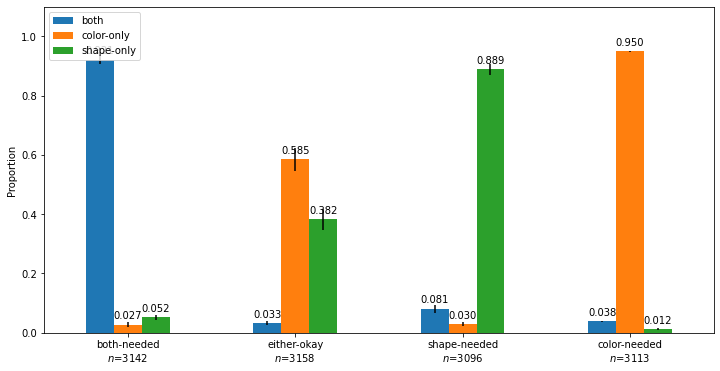

In [13]:
nonred_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
nonred_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_noncircle_dist]
eval_utils.visualize_utterance_distribution(nonred_noncircle_dist_per_speaker)

# Accuracy

In [14]:
gt_referents = eval_results[0]['all_referents']

## Val listener

In [15]:
val_accuracy_per_speaker = [eval_utils.analyze_accuracy(curr_speaker_results['val'], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

../../eval_utils.py:319: RuntimeWarning: invalid value encountered in true_divide
  incorrect_mean_maxprob_by_config /= num_incorrect_by_config


In [16]:
[val_accuracy['overall_accuracy'] for val_accuracy in val_accuracy_per_speaker]

[0.9182, 0.92665, 0.9228, 0.9235, 0.92545]

In [17]:
val_accuracy_per_speaker_by_condition = {}
for context in val_accuracy_per_speaker[0]['accuracy_by_context']:
    curr_context_acc = np.asarray([val_accuracy['accuracy_by_context'][context] for val_accuracy in val_accuracy_per_speaker])
    val_accuracy_per_speaker_by_condition[context] = curr_context_acc

aggregate_val_accuracy_by_condition = {condition: (np.mean(accs).round(4), np.std(accs).round(4)) for condition, accs in val_accuracy_per_speaker_by_condition.items()}

aggregate_val_accuracy_by_condition # each tuple is (mean, std)

{'both-needed': (0.8837, 0.0047),
 'either-okay': (0.9654, 0.0017),
 'shape-needed': (0.8808, 0.0076),
 'color-needed': (0.9634, 0.0018)}

# QA 

In [18]:
from collections import Counter

In [19]:
speaker_idx = 0 # only looking at 1 speaker

shape_qa = eval_utils.qualitative_analysis('shape-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
color_qa = eval_utils.qualitative_analysis('color-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
either_qa = eval_utils.qualitative_analysis('either-okay', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [20]:
shape_qa

[{'pred': 0,
  'referents': ['gray circle', 'gray rectangle', 'gray ellipse'],
  'utterance': 'circle',
  'sem': array([1.   , 0.   , 0.103], dtype=float32),
  'probs': array([0.563, 0.207, 0.23 ], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow square', 'yellow rectangle', 'yellow circle'],
  'utterance': 'square',
  'sem': array([0.997, 0.   , 0.   ], dtype=float32),
  'probs': array([0.575, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['blue rectangle', 'blue ellipse', 'blue square'],
  'utterance': 'rectangle',
  'sem': array([0.234, 0.   , 0.168], dtype=float32),
  'probs': array([0.367, 0.29 , 0.343], dtype=float32)},
 {'pred': 0,
  'referents': ['green square', 'green circle', 'green ellipse'],
  'utterance': 'square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red square', 'red circle', 'red ellipse'],
  'utterance': 'square',
  'sem': array([1., 0., 0.], dtype=float32)

## in `shape-needed`, what are examples where color is mentioned?

In [21]:
both_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

In [22]:
filtered_shape_qa = list(filter(both_filter_func, shape_qa))
filtered_shape_qa[:8]

[{'pred': 0,
  'referents': ['white square', 'white circle', 'white ellipse'],
  'utterance': 'white square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['green rectangle', 'green circle', 'green square'],
  'utterance': 'green rectangle',
  'sem': array([1.   , 0.   , 0.998], dtype=float32),
  'probs': array([0.423, 0.156, 0.422], dtype=float32)},
 {'pred': 0,
  'referents': ['blue ellipse', 'blue circle', 'blue square'],
  'utterance': 'blue circle',
  'sem': array([1.   , 0.999, 0.001], dtype=float32),
  'probs': array([0.422, 0.422, 0.156], dtype=float32)},
 {'pred': 0,
  'referents': ['white rectangle', 'white square', 'white ellipse'],
  'utterance': 'white rectangle',
  'sem': array([0.998, 0.993, 0.   ], dtype=float32),
  'probs': array([0.423, 0.421, 0.156], dtype=float32)},
 {'pred': 1,
  'referents': ['yellow rectangle', 'yellow square', 'yellow ellipse'],
  'utterance': 'yellow square',
 

In [23]:
Counter(map(lambda x:x['referents'][0], filtered_shape_qa)).most_common()

[('green ellipse', 40),
 ('white ellipse', 35),
 ('white square', 29),
 ('white rectangle', 29),
 ('green rectangle', 28),
 ('white circle', 27),
 ('yellow ellipse', 26),
 ('gray circle', 25),
 ('green square', 25),
 ('blue ellipse', 24),
 ('blue circle', 20),
 ('green circle', 19),
 ('blue square', 18),
 ('gray ellipse', 18),
 ('gray square', 15),
 ('red square', 15),
 ('yellow rectangle', 14),
 ('red rectangle', 14),
 ('gray rectangle', 13),
 ('red ellipse', 11),
 ('yellow circle', 7),
 ('yellow square', 6),
 ('blue rectangle', 3),
 ('red circle', 1)]

## in `color-needed`, what are examples where shape is mentioned 

In [24]:
# in color-needed, what are examples where color is mentioned
filtered_color_qa = list(filter(both_filter_func, color_qa))
filtered_color_qa[:8]

[{'pred': 0,
  'referents': ['blue ellipse', 'yellow ellipse', 'gray ellipse'],
  'utterance': 'blue ellipse',
  'sem': array([0.999, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['green square', 'blue square', 'gray square'],
  'utterance': 'green square',
  'sem': array([0.205, 0.027, 0.068], dtype=float32),
  'probs': array([0.369, 0.309, 0.322], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'blue ellipse', 'yellow ellipse'],
  'utterance': 'white ellipse',
  'sem': array([1.   , 0.   , 0.004], dtype=float32),
  'probs': array([0.576, 0.212, 0.213], dtype=float32)},
 {'pred': 0,
  'referents': ['green rectangle', 'white rectangle', 'yellow rectangle'],
  'utterance': 'green rectangle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red ellipse', 'yellow ellipse', 'blue ellipse'],
  'utterance': 'red ellipse',
  '

In [25]:
Counter(map(lambda x:x['referents'][0], filtered_color_qa)).most_common()

[('green ellipse', 20),
 ('blue ellipse', 15),
 ('green rectangle', 13),
 ('green square', 12),
 ('white ellipse', 10),
 ('red ellipse', 10),
 ('gray rectangle', 10),
 ('yellow square', 8),
 ('red rectangle', 7),
 ('gray circle', 7),
 ('gray ellipse', 6),
 ('yellow ellipse', 6),
 ('green circle', 4),
 ('blue rectangle', 4),
 ('yellow rectangle', 4),
 ('red circle', 4),
 ('blue square', 4),
 ('red square', 3),
 ('blue circle', 3),
 ('white square', 2),
 ('white rectangle', 2),
 ('gray square', 2),
 ('yellow circle', 1)]

## in `either-okay` 

### mentions color, no shape 

In [26]:
color_only_filter_func = lambda x: any([c in x['utterance'] for c in eval_utils.COLORS]) and all([s not in x['utterance'] for s in eval_utils.SHAPES])

color_only_filtered_qa = list(filter(color_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], color_only_filtered_qa)).most_common()

[('white rectangle', 164),
 ('yellow ellipse', 155),
 ('red rectangle', 139),
 ('white square', 139),
 ('blue rectangle', 139),
 ('white ellipse', 136),
 ('white circle', 132),
 ('yellow circle', 132),
 ('gray rectangle', 131),
 ('green rectangle', 122),
 ('gray ellipse', 120),
 ('blue ellipse', 113),
 ('yellow rectangle', 109),
 ('yellow square', 108),
 ('red ellipse', 106),
 ('blue circle', 103),
 ('green square', 102),
 ('red square', 99),
 ('green ellipse', 99),
 ('gray square', 98),
 ('blue square', 97),
 ('gray circle', 93),
 ('green circle', 85),
 ('red circle', 83)]

In [27]:
color_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['white circle', 'blue ellipse', 'red square'],
  'utterance': 'white shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red rectangle', 'gray square', 'gray circle'],
  'utterance': 'red shape',
  'sem': array([0.999, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'yellow rectangle', 'gray circle'],
  'utterance': 'white shape',
  'sem': array([1.   , 0.004, 0.   ], dtype=float32),
  'probs': array([0.576, 0.213, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow square', 'blue ellipse', 'green rectangle'],
  'utterance': 'yellow shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow rectangle', 'gray square', 'blue square'],
  'utterance': 'yellow shape',
  'sem': array([1., 0., 0.]

### mentions shape, but no color 

In [28]:
shape_only_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and all([c not in x['utterance'] for c in eval_utils.COLORS])

shape_only_filtered_qa = list(filter(shape_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('blue circle', 115),
 ('green circle', 106),
 ('gray square', 106),
 ('gray circle', 104),
 ('blue square', 103),
 ('red circle', 100),
 ('green square', 99),
 ('yellow square', 98),
 ('blue ellipse', 96),
 ('red ellipse', 96),
 ('yellow rectangle', 95),
 ('white circle', 90),
 ('green ellipse', 90),
 ('white square', 80),
 ('gray ellipse', 79),
 ('red square', 78),
 ('yellow circle', 73),
 ('blue rectangle', 73),
 ('green rectangle', 70),
 ('gray rectangle', 70),
 ('white rectangle', 66),
 ('white ellipse', 54),
 ('red rectangle', 54),
 ('yellow ellipse', 53)]

In [29]:
shape_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['white square', 'blue ellipse', 'red rectangle'],
  'utterance': 'square',
  'sem': array([0.999, 0.   , 0.053], dtype=float32),
  'probs': array([0.569, 0.21 , 0.221], dtype=float32)},
 {'pred': 0,
  'referents': ['white rectangle', 'yellow circle', 'yellow ellipse'],
  'utterance': 'rectangle',
  'sem': array([0.972, 0.   , 0.   ], dtype=float32),
  'probs': array([0.569, 0.215, 0.215], dtype=float32)},
 {'pred': 0,
  'referents': ['gray ellipse', 'red square', 'blue square'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red square', 'yellow circle', 'green ellipse'],
  'utterance': 'square',
  'sem': array([1.   , 0.007, 0.   ], dtype=float32),
  'probs': array([0.575, 0.213, 0.212], dtype=float32)},
 {'pred': 2,
  'referents': ['blue square', 'red ellipse', 'red rectangle'],
  'utterance': 'square',
  'sem': array([0.039, 0.   , 0.991], dtype=

## mentions both color and shape 

In [30]:
both_present_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

both_present_filtered_qa = list(filter(both_present_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('blue circle', 115),
 ('green circle', 106),
 ('gray square', 106),
 ('gray circle', 104),
 ('blue square', 103),
 ('red circle', 100),
 ('green square', 99),
 ('yellow square', 98),
 ('blue ellipse', 96),
 ('red ellipse', 96),
 ('yellow rectangle', 95),
 ('white circle', 90),
 ('green ellipse', 90),
 ('white square', 80),
 ('gray ellipse', 79),
 ('red square', 78),
 ('yellow circle', 73),
 ('blue rectangle', 73),
 ('green rectangle', 70),
 ('gray rectangle', 70),
 ('white rectangle', 66),
 ('white ellipse', 54),
 ('red rectangle', 54),
 ('yellow ellipse', 53)]

In [31]:
qa = eval_utils.qualitative_analysis('both-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [32]:
filter_func = lambda x: 'white' in x['referents'][0] and 'gray' in x['utterance']

In [33]:
list(filter(filter_func, qa))

[]